### Q-4. 
Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
# Importing libraries

# To read data and numeric operations
import pandas as pd

# Graph plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# Sk-learn library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Balodi\Downloads\online_shoppers_intention.csv\online_shoppers_intention.csv")

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape

(12330, 18)

In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [9]:
df.duplicated().sum()

125

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
# For categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

['Month', 'VisitorType']


In [14]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']


In [15]:
# EDA

<Axes: >

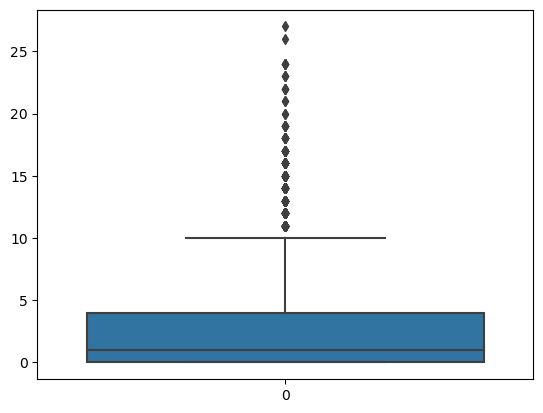

In [16]:
sns.boxplot(df['Administrative'])

Text(0.5, 0, 'Administrative')

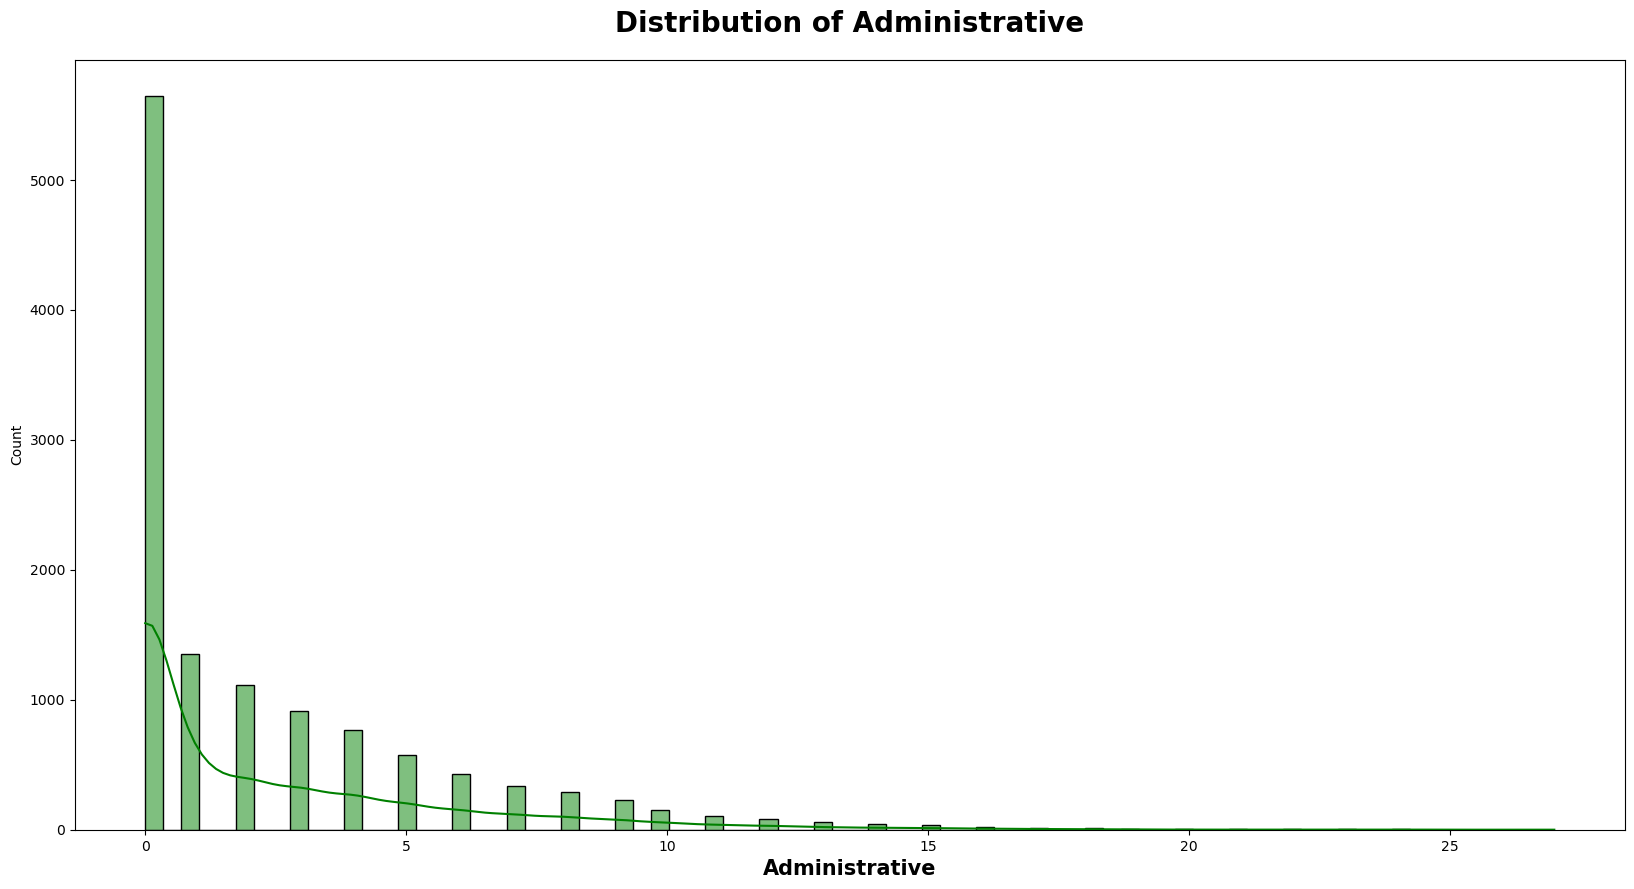

In [17]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Administrative", x=df.Administrative, color='g', kde=True)
plt.title("Distribution of Administrative", weight='bold', fontsize=20, pad=20)
plt.xlabel('Administrative', weight='bold', fontsize=15)


<Axes: >

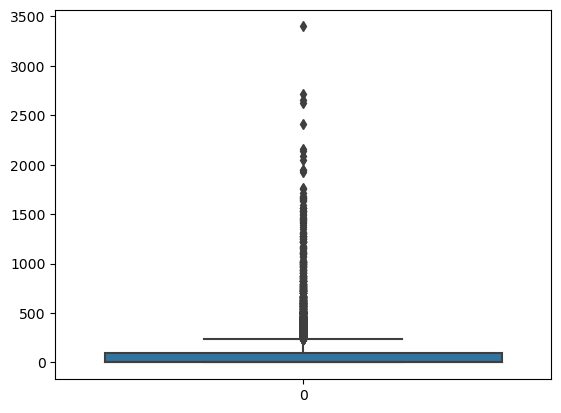

In [18]:
sns.boxplot(df['Administrative_Duration'])

<Axes: >

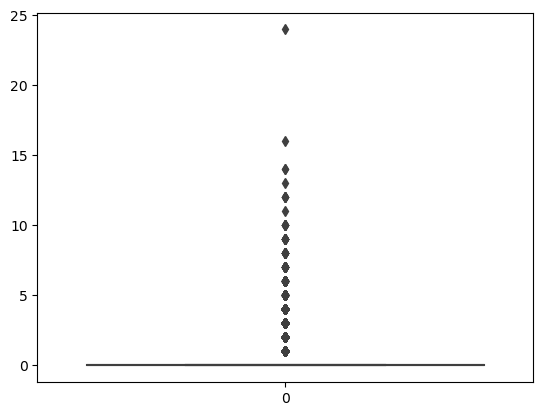

In [19]:
sns.boxplot(df['Informational'])

<Axes: >

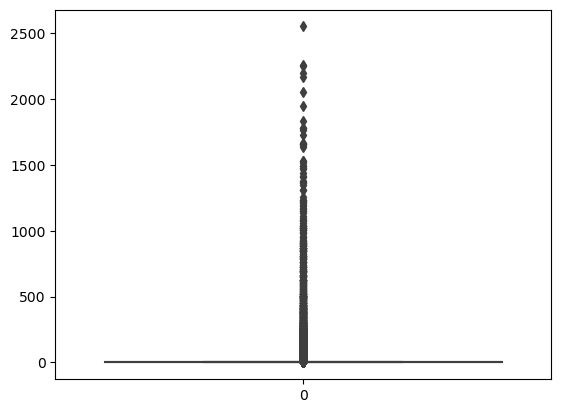

In [20]:
sns.boxplot(df['Informational_Duration'])

In [21]:
df['Informational_Duration'].value_counts()

0.00      9800
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64

<Axes: xlabel='Informational_Duration', ylabel='Count'>

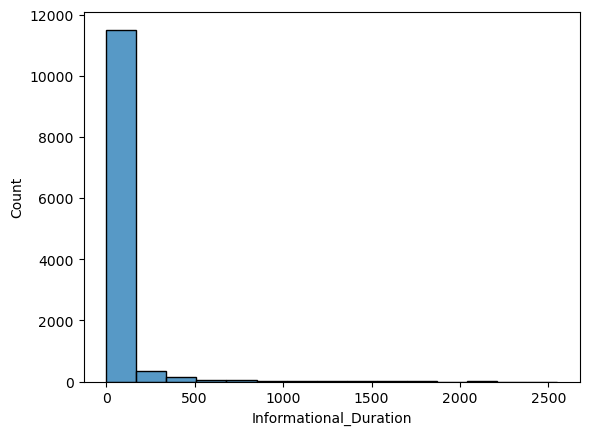

In [22]:
sns.histplot(df['Informational_Duration'])

<Axes: >

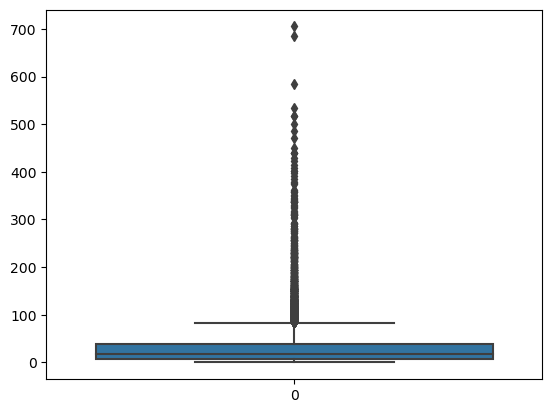

In [23]:
sns.boxplot(df['ProductRelated'])

<Axes: xlabel='ProductRelated', ylabel='Density'>

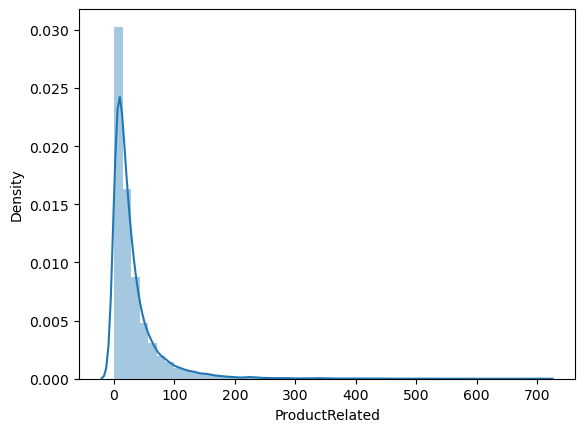

In [24]:
sns.distplot(df['ProductRelated'])

<Axes: >

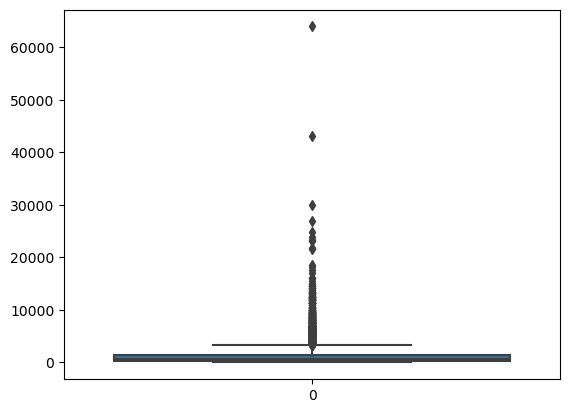

In [25]:
sns.boxplot(df['ProductRelated_Duration'])

Text(0.5, 0, 'ProductRelated_Duration')

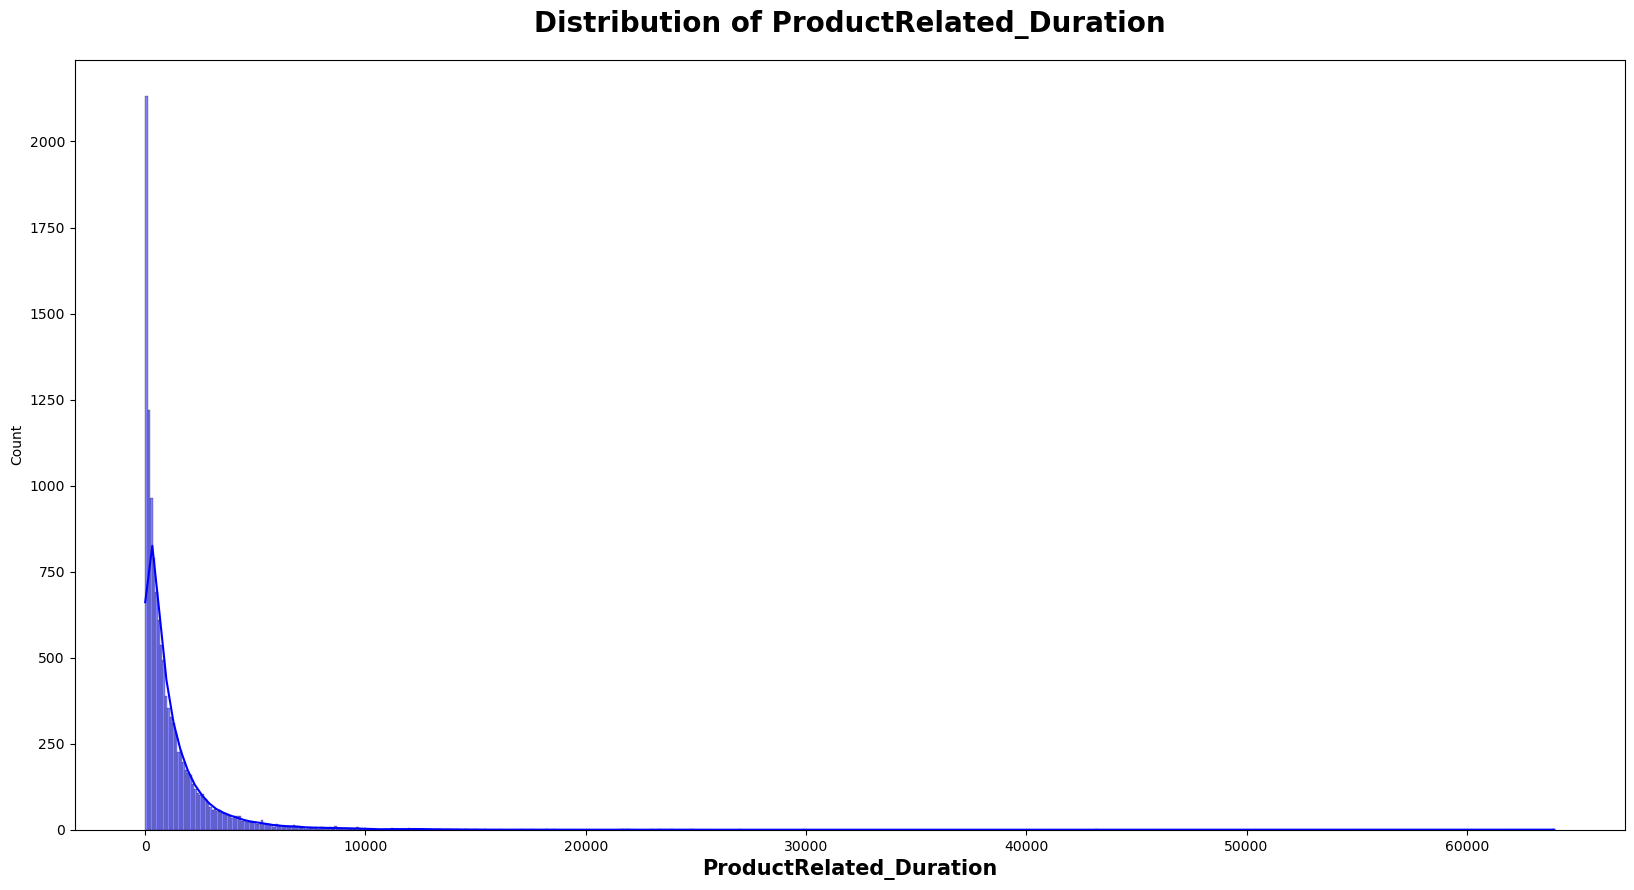

In [26]:
plt.subplots(figsize=(20,10))
sns.histplot("ProductRelated_Duration", x=df.ProductRelated_Duration, color='b', kde=True)
plt.title("Distribution of ProductRelated_Duration", weight='bold', fontsize=20, pad=20)
plt.xlabel('ProductRelated_Duration', weight='bold', fontsize=15)

<Axes: >

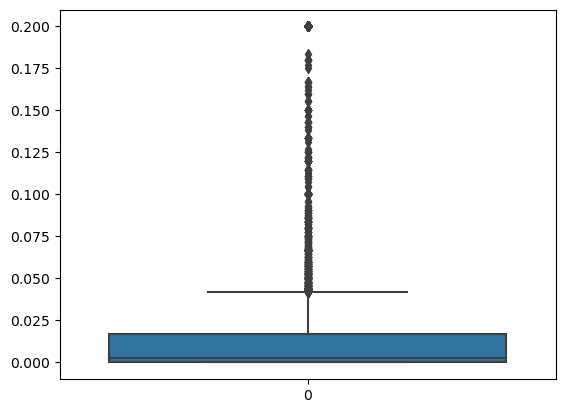

In [27]:
sns.boxplot(df['BounceRates'])

<Axes: xlabel='BounceRates', ylabel='Density'>

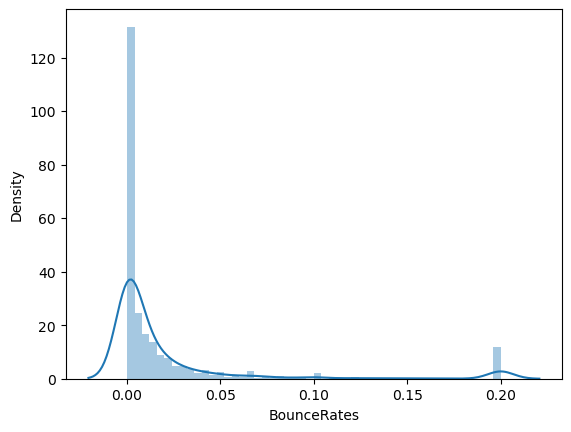

In [28]:
sns.distplot(df['BounceRates'])

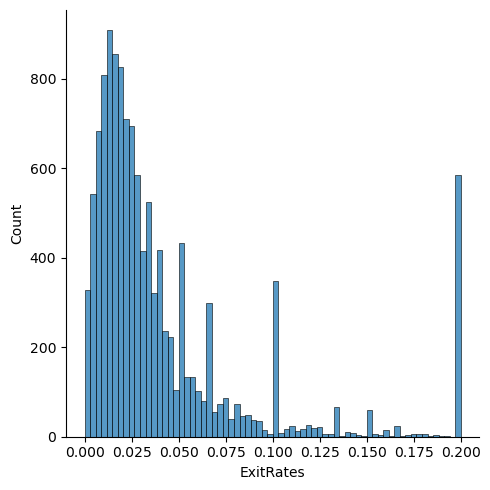

In [29]:
sns.displot(df['ExitRates'])

Text(0.5, 1.0, "'SpecialDay' column count plot")

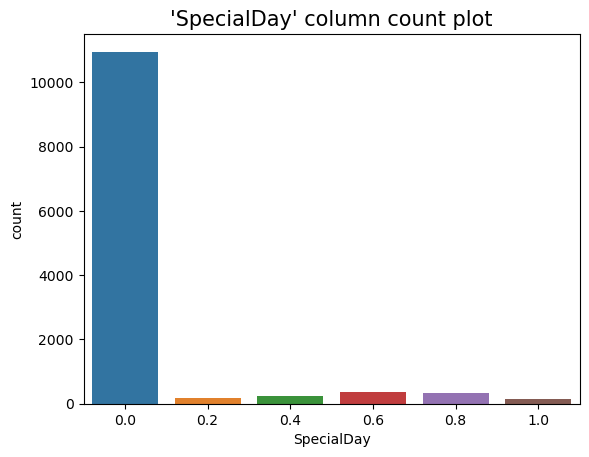

In [30]:
sns.countplot(x='SpecialDay', palette="tab10", data=df)
plt.title("'SpecialDay' column count plot", fontsize=15)

Text(0.5, 1.0, 'Feature name : Month')

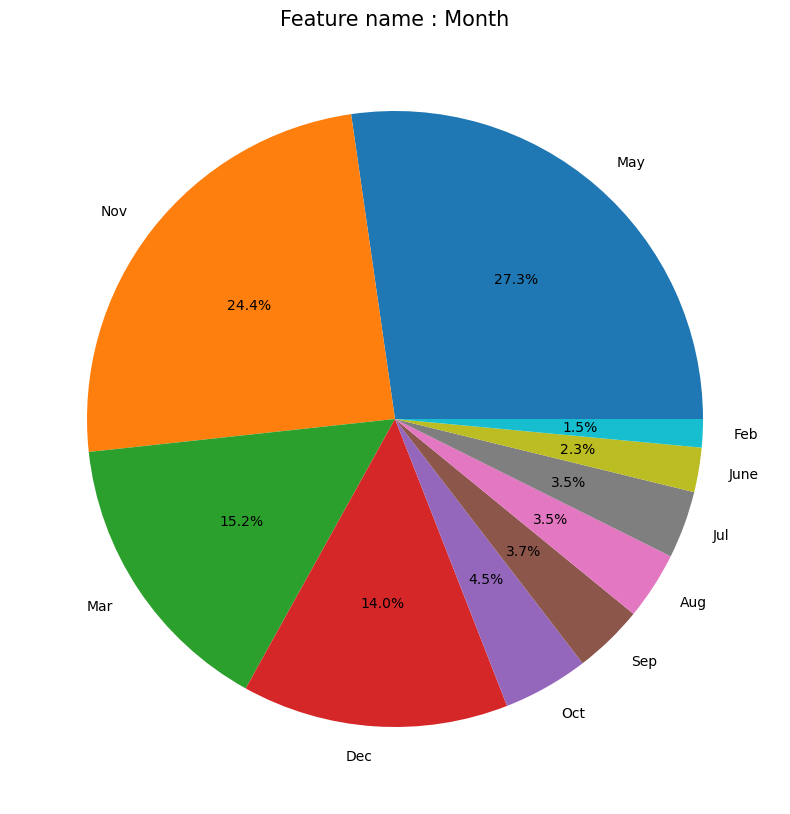

In [31]:
plt.figure(figsize=(20,10))
df.value_counts('Month').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Month", fontsize = 15)

<Axes: ylabel='count'>

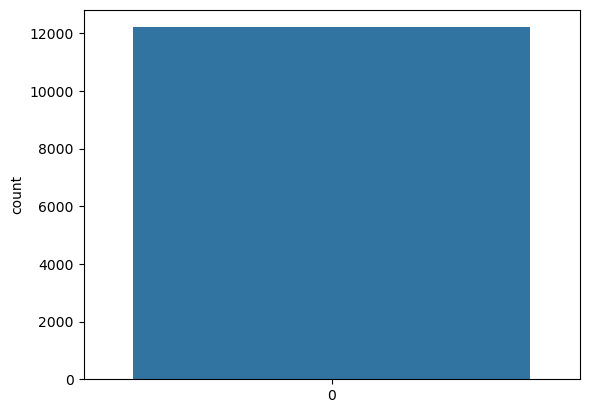

In [32]:
sns.countplot(df['OperatingSystems'])

<Axes: ylabel='count'>

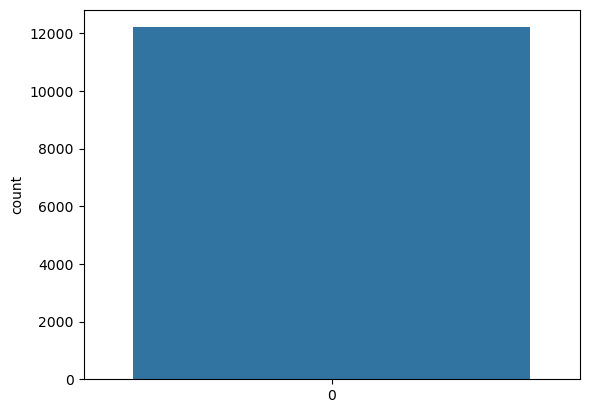

In [33]:
sns.countplot(df['Browser'])

<Axes: ylabel='count'>

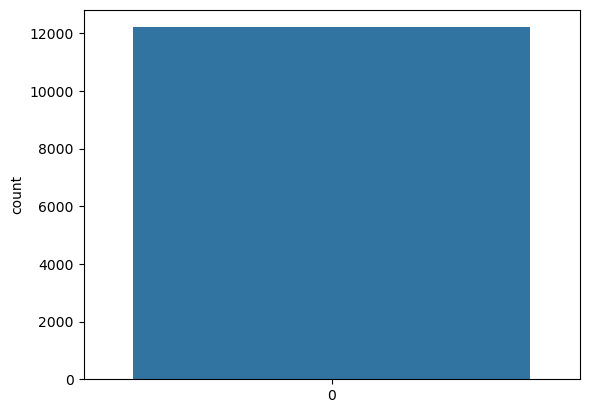

In [34]:
sns.countplot(df['TrafficType'])

Text(0.5, 1.0, 'Feature name : Weekend')

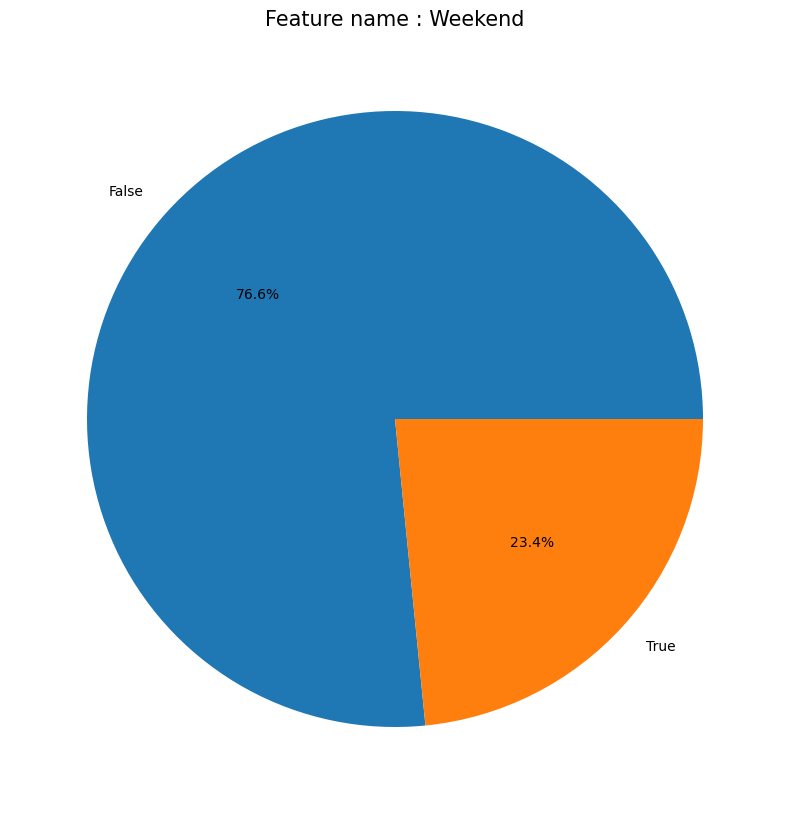

In [35]:
plt.figure(figsize=(20,10))
df.value_counts('Weekend').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Weekend", fontsize = 15)

<Axes: ylabel='count'>

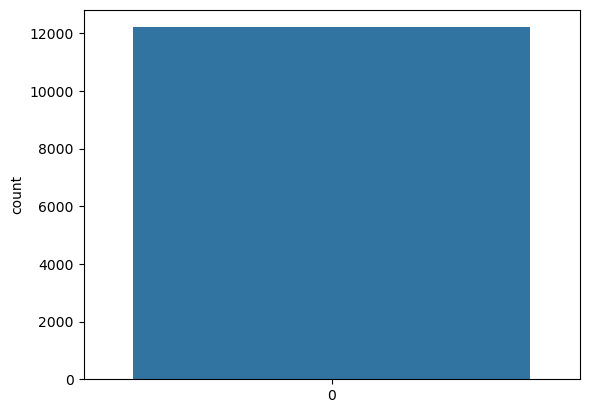

In [36]:
sns.countplot(df['Revenue'])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

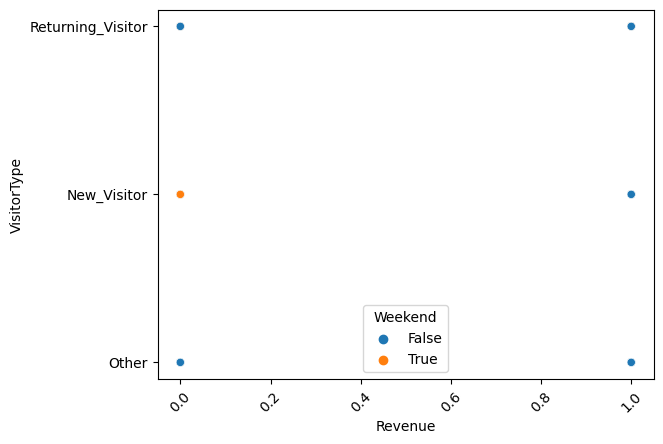

In [37]:
# Scatter plot

sns.scatterplot(data=df, x='Revenue', y='VisitorType', hue='Weekend')
plt.xticks(rotation=45)

In [38]:
# Data preprocessing

In [39]:
# Drop irrelevant columns

data = df.drop(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'], axis=1)

In [46]:
# Convert boolean columns to binary

data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

In [47]:
# Split the data into features and target
X = data.drop(['Revenue'], axis=1)
y = data['Revenue']

In [48]:
# Converting categorical variables to numerical using one-hot encoding

X_encoded = pd.get_dummies(X)

In [49]:
# Splitting the data into training and testing sets

X_train, X_test, y_Revenue_train, y_Revenue_test, y_weekend_train, y_weekend_test, informational_duration_train, informational_duration_test = train_test_split(X_encoded, y_Revenue, y_weekend, informational_duration, test_size=0.2, random_state=42)


NameError: name 'y_Revenue' is not defined

In [44]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
